In [2]:
from collections import defaultdict

from workflow.gunc.rank_contigs_by_contamination import GuncRankContigsByContamination
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DF_RANKING = GuncRankContigsByContamination().output().read_cached()
DF_RANKING.head()

gid      contig   length         gc  correct_genes  \
0  GCA_000143435.1  CP002036.1    20426  38.690884              0   
1  GCA_000143435.1  CP002035.1    44581  39.380005              0   
2  GCA_000143435.1  CP002037.1   242962  31.996773            202   
3  GCA_000143435.1  CP002034.1  1828169  32.897724           1626   
4  GCA_000153745.1  DS022288.2    65290  41.966611              0   

   total_genes  pct_correct  gc_delta  order  
0           26     0.000000  5.793160      0  
1           50     0.000000  6.482280      1  
2          246    82.113821  0.900951      2  
3         1788    90.939597  0.000000      3  
4           61     0.000000  5.338278      0

In [4]:
D_GID_TO_TOTAL_SIZE = DF_RANKING[['gid', 'length']].groupby('gid').sum().to_dict()['length']

In [11]:
PCT_REMOVED = ( 50, )
CONGRUENCE = (50, 80, 90, 100)

# Vary proprortion removed, and the permissible contamination
def gen_data_123():

    results = defaultdict(list)

    for congruence in CONGRUENCE:
        print(f'Congruence: {congruence}')
        df_below_congruence = DF_RANKING[DF_RANKING['pct_correct'] < congruence]

        for pct_removed in PCT_REMOVED:
            d_gid_to_total_len_removed = defaultdict(lambda: 0)
            skip_gids = set()

            for row in tqdm(df_below_congruence.itertuples(), total=len(df_below_congruence), desc=f'{pct_removed}%'):
                gid = row.gid
                contig_len = int(row.length)

                if gid in skip_gids:
                    continue

                # Calculate the new pct removed for this genome
                new_pct_removed = (d_gid_to_total_len_removed[gid] + contig_len) / D_GID_TO_TOTAL_SIZE[gid] * 100

                # Don't remove every contig!
                if new_pct_removed >= 100:
                    skip_gids.add(gid)
                    continue

                # Otherwise, remove this contig
                d_gid_to_total_len_removed[gid] += contig_len

                # We've reached the goal, stop removing contigs
                if new_pct_removed >= pct_removed:
                    skip_gids.add(gid)
                    continue

            # Save the results
            for gid, total_length in D_GID_TO_TOTAL_SIZE.items():
                final_pct_removed = d_gid_to_total_len_removed[gid] / total_length * 100
                if final_pct_removed < pct_removed:
                    print(f'C={congruence} P={pct_removed} ({gid}) = {final_pct_removed}')
                results[(congruence, pct_removed)].append(final_pct_removed)

    return results

DATA_123 = gen_data_123()

Congruence: 50


50%: 100%|██████████| 2273096/2273096 [00:04<00:00, 539186.40it/s]


C=50 P=50 (GCA_000143435.1) = 3.0432022650222037
C=50 P=50 (GCA_000153745.1) = 2.842646931408571
C=50 P=50 (GCA_000155005.1) = 25.586784471709446
C=50 P=50 (GCA_000161815.1) = 28.819296050145404
C=50 P=50 (GCA_000166735.2) = 5.623413898858529
C=50 P=50 (GCA_000168235.2) = 8.878320727011038
C=50 P=50 (GCA_000168835.1) = 3.4383002813099894
C=50 P=50 (GCA_000172255.1) = 44.62593098815697
C=50 P=50 (GCA_000180255.1) = 5.92842036340379
C=50 P=50 (GCA_000180375.1) = 3.1754170961491557
C=50 P=50 (GCA_000181855.2) = 37.570373980938534
C=50 P=50 (GCA_000189875.2) = 1.0043219889467583
C=50 P=50 (GCA_000196215.1) = 8.376413750336908
C=50 P=50 (GCA_000208785.1) = 9.467324442678118
C=50 P=50 (GCA_000212335.1) = 6.327546897790359
C=50 P=50 (GCA_000219335.2) = 6.328832554032543
C=50 P=50 (GCA_000224475.1) = 20.022985552644162
C=50 P=50 (GCA_000249655.2) = 2.923883048692776
C=50 P=50 (GCA_000249795.2) = 6.004933817873153
C=50 P=50 (GCA_000249995.2) = 2.4957103639209706
C=50 P=50 (GCA_000250435.2) = 7.

50%: 100%|██████████| 2848614/2848614 [00:05<00:00, 532989.78it/s]


C=80 P=50 (GCA_000143435.1) = 3.0432022650222037
C=80 P=50 (GCA_000153745.1) = 2.842646931408571
C=80 P=50 (GCA_000155005.1) = 26.81939038104743
C=80 P=50 (GCA_000161815.1) = 28.819296050145404
C=80 P=50 (GCA_000166735.2) = 13.39722412718747
C=80 P=50 (GCA_000168235.2) = 8.925990193656034
C=80 P=50 (GCA_000168835.1) = 5.292236407710335
C=80 P=50 (GCA_000172255.1) = 45.44200876577411
C=80 P=50 (GCA_000180255.1) = 14.584626236810275
C=80 P=50 (GCA_000180375.1) = 10.562704298534637
C=80 P=50 (GCA_000181855.2) = 37.570373980938534
C=80 P=50 (GCA_000189875.2) = 2.8321684964644107
C=80 P=50 (GCA_000196215.1) = 8.376413750336908
C=80 P=50 (GCA_000208785.1) = 10.046088929532399
C=80 P=50 (GCA_000212335.1) = 6.327546897790359
C=80 P=50 (GCA_000219335.2) = 7.402088578627118
C=80 P=50 (GCA_000224475.1) = 20.022985552644162
C=80 P=50 (GCA_000249655.2) = 10.869884213364092
C=80 P=50 (GCA_000249795.2) = 15.754653085404563
C=80 P=50 (GCA_000249995.2) = 15.775354399105392
C=80 P=50 (GCA_000250435.2) =

50%: 100%|██████████| 3192683/3192683 [00:05<00:00, 536918.07it/s]


C=90 P=50 (GCA_000143435.1) = 14.41709290317386
C=90 P=50 (GCA_000153745.1) = 2.842646931408571
C=90 P=50 (GCA_000161815.1) = 46.03973825165
C=90 P=50 (GCA_000166735.2) = 23.09968112622319
C=90 P=50 (GCA_000168235.2) = 13.028439149089685
C=90 P=50 (GCA_000168835.1) = 11.864632255716192
C=90 P=50 (GCA_000172255.1) = 45.44200876577411
C=90 P=50 (GCA_000180255.1) = 28.578106417259168
C=90 P=50 (GCA_000180375.1) = 27.459527207706646
C=90 P=50 (GCA_000181855.2) = 37.570373980938534
C=90 P=50 (GCA_000189875.2) = 4.962508016758041
C=90 P=50 (GCA_000196215.1) = 8.376413750336908
C=90 P=50 (GCA_000208785.1) = 10.725290649536914
C=90 P=50 (GCA_000212335.1) = 6.327546897790359
C=90 P=50 (GCA_000219335.2) = 9.673962602313312
C=90 P=50 (GCA_000224475.1) = 20.022985552644162
C=90 P=50 (GCA_000249655.2) = 29.547422216235823
C=90 P=50 (GCA_000249995.2) = 26.890629974343216
C=90 P=50 (GCA_000250435.2) = 32.085388898950086
C=90 P=50 (GCA_000250455.2) = 32.43336507880439
C=90 P=50 (GCA_000255595.2) = 7.2

50%: 100%|██████████| 3824764/3824764 [00:06<00:00, 553231.91it/s]


C=100 P=50 (GCA_000143435.1) = 14.41709290317386
C=100 P=50 (GCA_000153745.1) = 2.842646931408571
C=100 P=50 (GCA_000166735.2) = 30.555357323131226
C=100 P=50 (GCA_000168835.1) = 31.72265365960105
C=100 P=50 (GCA_000181855.2) = 39.18532509470155
C=100 P=50 (GCA_000196215.1) = 8.376413750336908
C=100 P=50 (GCA_000208785.1) = 11.37218483424815
C=100 P=50 (GCA_000212335.1) = 6.327546897790359
C=100 P=50 (GCA_000219335.2) = 31.333405093765503
C=100 P=50 (GCA_000224475.1) = 20.022985552644162
C=100 P=50 (GCA_000255595.2) = 8.043488349625362
C=100 P=50 (GCA_000258575.2) = 42.89012366842379
C=100 P=50 (GCA_000371825.1) = 48.99152563746879
C=100 P=50 (GCA_000379225.1) = 5.1912744764620475
C=100 P=50 (GCA_000380765.1) = 37.01708308555441
C=100 P=50 (GCA_000404765.1) = 24.43792465163984
C=100 P=50 (GCA_000421005.1) = 24.513224195234496
C=100 P=50 (GCA_000431375.1) = 47.580692262996116
C=100 P=50 (GCA_000431935.1) = 24.880687933143772
C=100 P=50 (GCA_000432055.1) = 23.32119562018767
C=100 P=50 (G

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

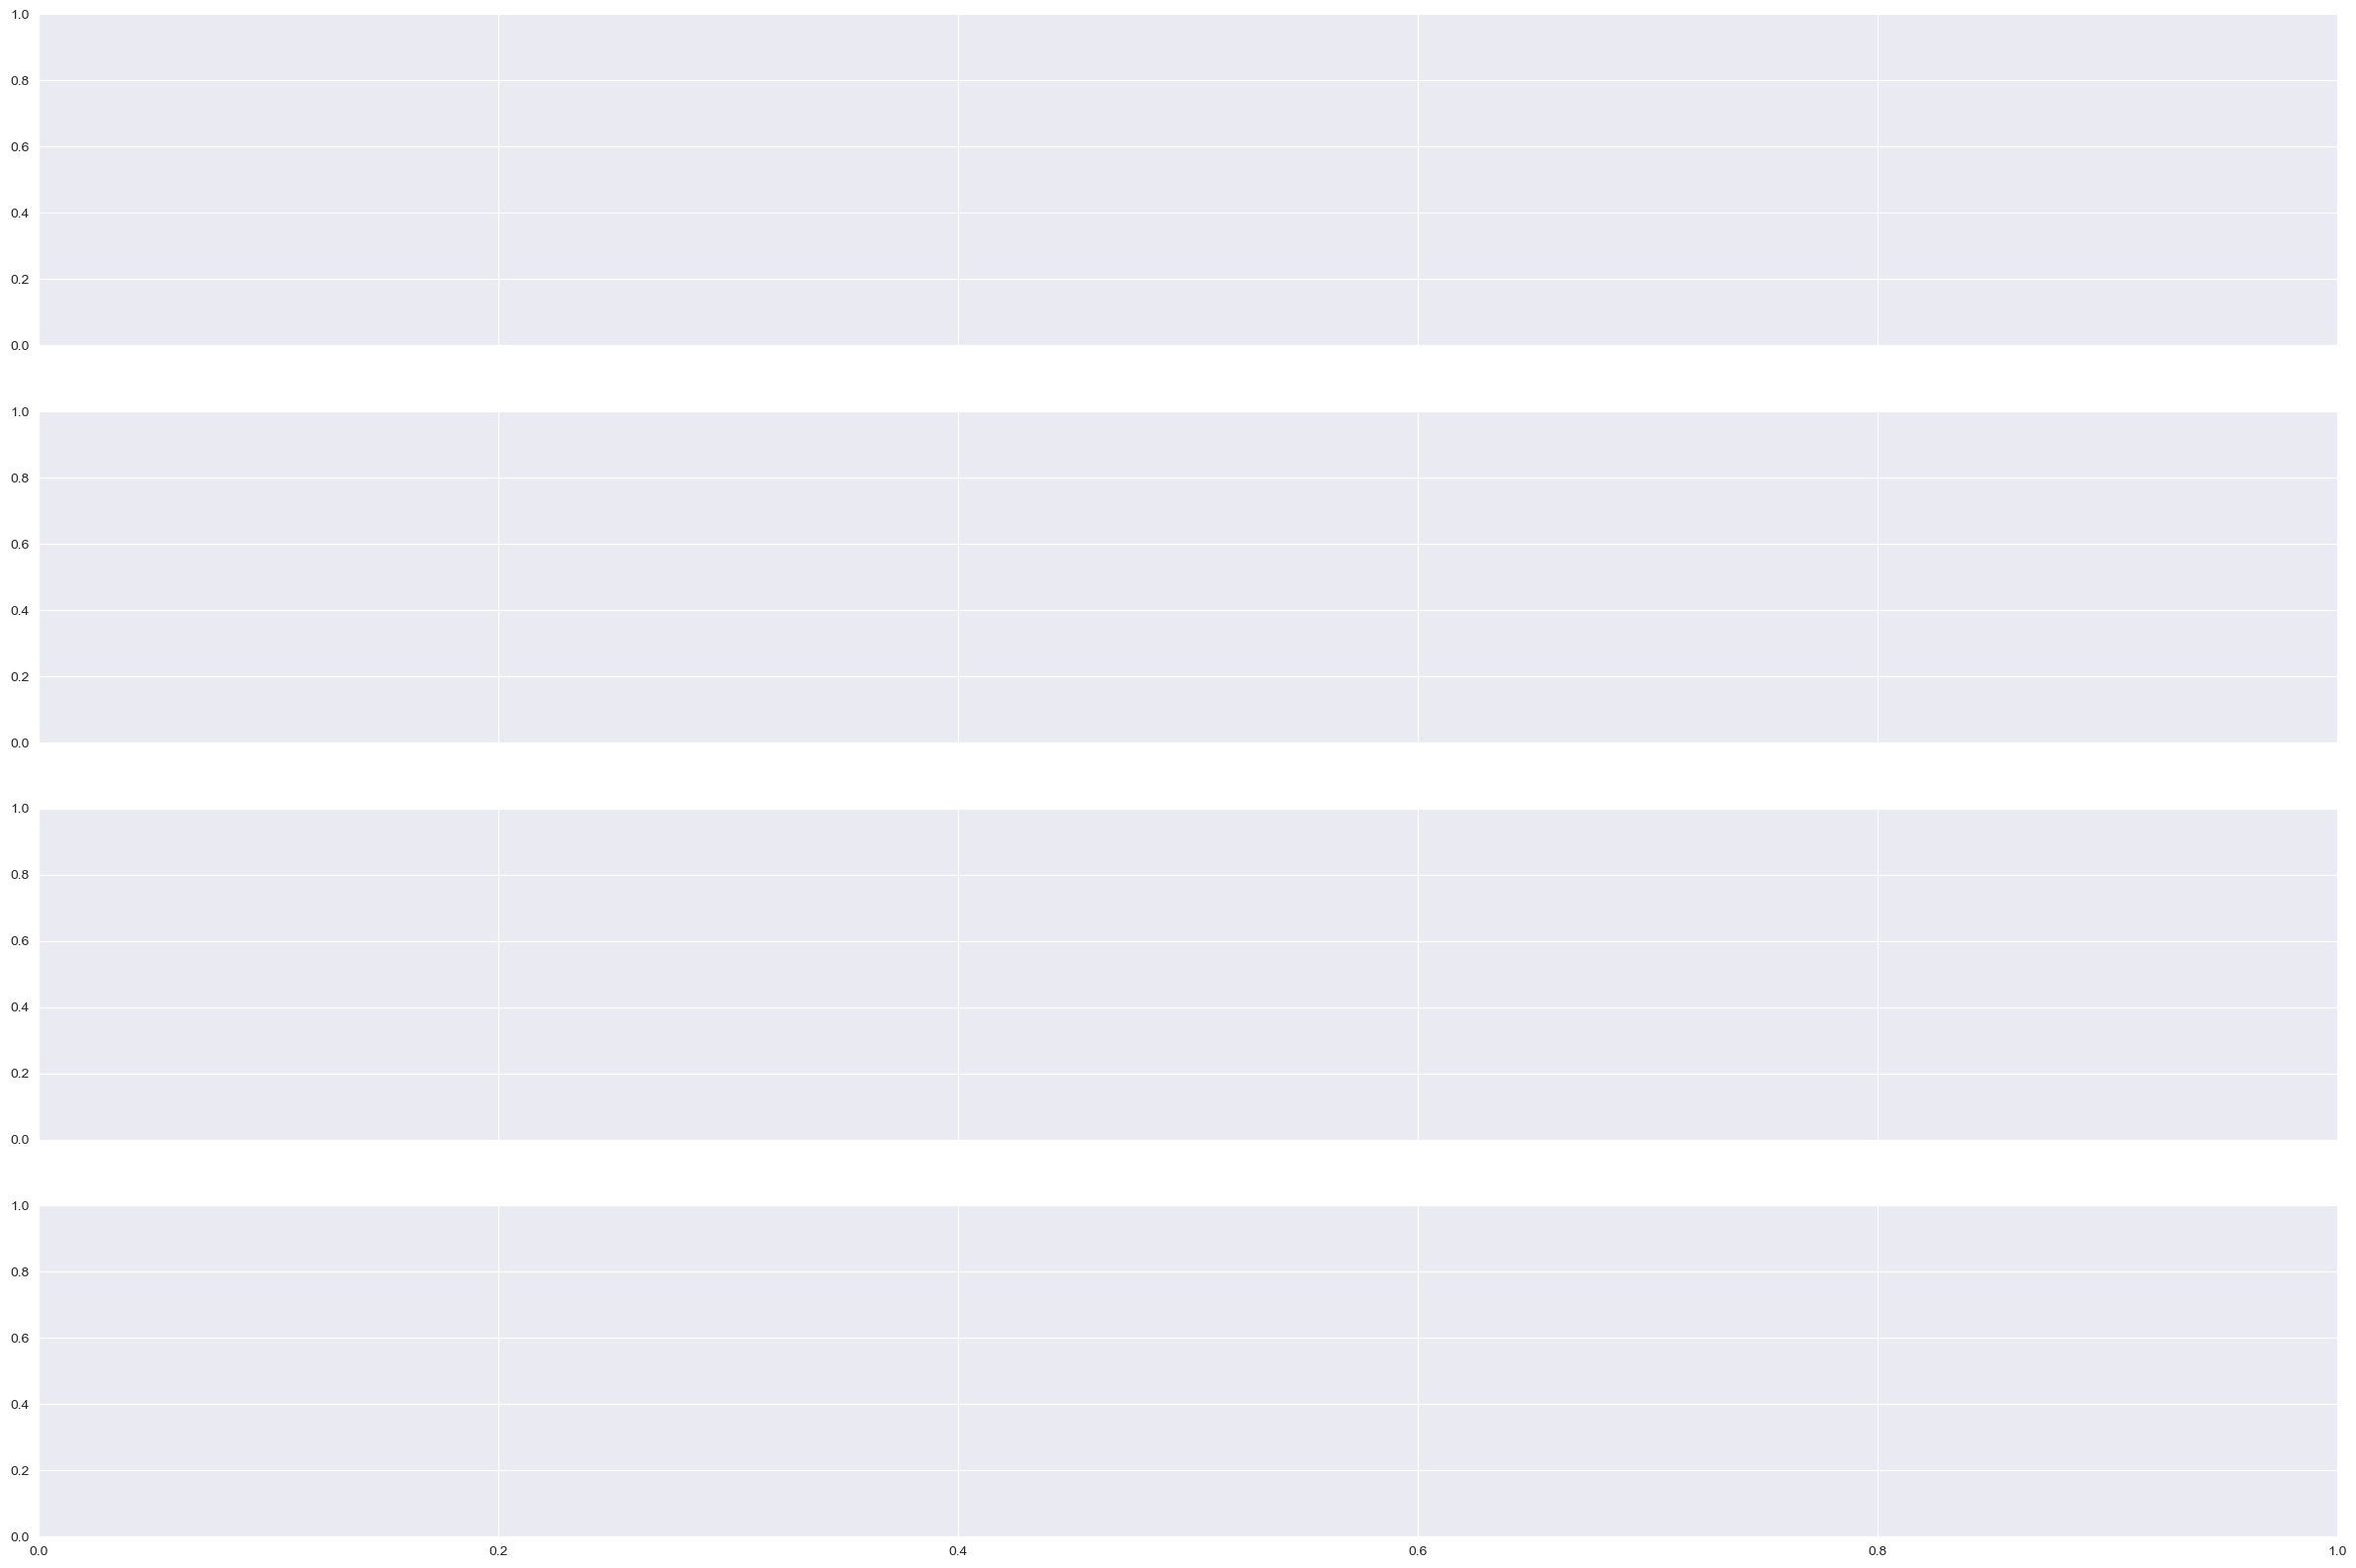

In [7]:
def plot_data_123():

    fig, axes = plt.subplots(len(CONGRUENCE), len(PCT_REMOVED), sharex=True,sharey=True, figsize=(30,20))

    for i, congruence in enumerate(CONGRUENCE):
        for j, pct_removed in enumerate(PCT_REMOVED):
            ax = axes[i, j]
            ax.boxplot(DATA_123[(congruence, pct_removed)])
            ax.set_title(f'c={congruence}/p={pct_removed}')

    plt.show()

    return

plot_data_123()

In [10]:
for i, congruence in enumerate(CONGRUENCE):
    for j, pct_removed in enumerate(PCT_REMOVED):
        print(f'C={congruence} / P={pct_removed} = {min(DATA_123[(congruence, pct_removed)])}')

C=50 / P=50 = 0.0
C=80 / P=50 = 0.4956951705345933
C=90 / P=50 = 0.4956951705345933
C=100 / P=50 = 1.0388200140344062
